# MATPLOTLIB & SEABORN TO VISUALIZE PHENOTYPE DATA

## 1-Introduction

In this tutorial we're going to go through the functions I used to illustrate the phenotype data while taking a deeper look at the different matplotlib and seaborn plotting functions utilized. A fundamental basis for both libraries would be helpful. These two tutorials get at most of the essentials:

- Matplotlib: https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python
- Seaborn: https://www.datacamp.com/community/tutorials/seaborn-python-tutorial

There are mainly three functions I use recurrently to plot phenotypic data: `FC_timecourse`, `barplot_UtErlAF154`, and `barplotFC_TvsUT`. The first one is used to plot measurements over time, and the other two generate bar plots of observations at a specified time point. These three functions can be used for any kind of phenotype. In this tutorial I'm going to be using the cell viability data but in the notebook `Fig2-CellMmigration.ipynb` you will see the same re-implementation with the cell migration measurements. 

Finally, this also introduces you to seaborn heatmaps using hierarchical clustering.

## 2-Import General Libraries and Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from msresist.figures.figure1 import FC_timecourse, barplot_UtErlAF154, barplotFC_TvsUT  

This sets a common format for all seaborn plots that we use in the lab

In [2]:
sns.set(style="whitegrid", font_scale=1.15, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

## 3-Pandas primer

`Pandas` is the best library to import, preprocess, and format data tables. Once you have a data table of the type `pandas.core.frame.DataFrame`, you can apply extremely useful pandas functions to preprocess your data set following the typical structure: `dataframe.f()`. As a general note, every time I need to figure out something with pandas, I pay specially attention to links directing me to *GeeksforGeeks*'s tutorials (eg: https://www.geeksforgeeks.org/python-extracting-rows-using-pandas-iloc/).

### 3.1-Import data sets:

`pandas.read_csv` allows you to import *csv* files

In [3]:
df = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR1_Phase.csv')

`pandas.read_csv` allows you to import *csv* files into pandas dataframes. Use `.head()` to take a preliminary look at the dataframe. By default it will show 5 rows, but you can pass an integer to display the desired number of rows.

In [4]:
df.head(10)

,Elapsed,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT,AXL KO-A/E,AXL KO-E,Kin-UT,Kin-A/E,Kin-E,Kdead-UT,Kdead-A/E,Kdead-E,M4-UT,M4-A/E,...,M5-UT,M5-A/E,M5-E,M7-UT,M7-A/E,M7-E,M10-UT,M10-A/E,M10-E,M11-UT,M11-A/E,M11-E,M15-UT,M15-A/E,M15-E
0,0,4.265529,3.979150,3.888071,3.374679,3.473018,3.062091,4.434666,3.606998,3.923480,3.686892,3.372610,3.099534,4.367269,4.375888,...,4.912151,4.653143,4.132826,5.119837,4.498675,4.585951,4.882211,4.547114,4.700694,4.494032,3.529023,3.536461,8.315177,7.249392,7.839774
1,3,4.603372,4.210015,4.329306,3.581867,3.620124,3.240773,4.857429,3.806620,4.078227,3.963478,3.637136,3.323256,4.845846,4.620260,...,5.434446,4.899639,4.342677,5.457837,4.714871,5.030444,5.166999,4.680759,4.989832,5.000840,4.551512,3.702770,9.123962,7.896763,8.415285
2,6,5.198959,4.734689,4.959818,3.930657,3.960487,3.733739,5.109839,4.280131,4.562384,4.387531,3.954196,3.653655,5.281611,4.935362,...,5.585685,5.118164,4.466831,5.643343,5.036379,5.346017,5.293747,4.929380,5.022522,5.027651,4.303786,3.890741,9.505661,7.755633,8.779768
3,9,5.445155,5.290838,5.569117,3.977962,4.315785,3.985393,5.499467,4.699266,5.051327,4.559393,4.345574,3.945545,5.596754,5.486663,...,6.131556,5.562152,4.848667,6.311236,5.657288,5.889382,5.520364,5.395078,5.270713,5.531851,4.927126,4.321213,10.086495,8.324027,9.785594
4,12,6.010536,5.733890,6.128141,4.259642,4.785299,4.207994,5.805937,5.094343,5.470478,5.163161,4.787191,4.362885,6.270767,5.942621,...,6.351329,6.075311,5.378995,6.775718,6.071787,6.367338,6.275125,6.025336,6.108309,5.926921,5.603986,4.318674,10.833190,9.015541,10.610790
5,15,6.448761,6.224083,6.924785,4.783654,5.150411,4.810608,6.448235,5.578821,6.089721,5.641274,5.225388,4.796288,6.685758,6.227136,...,6.885988,6.421690,5.513993,7.157978,6.215867,6.899646,6.621707,6.272563,6.387456,6.316624,5.681846,5.046820,11.203650,9.108001,10.494625
6,18,6.803424,6.637292,7.146177,4.991579,5.407138,4.747390,6.807180,5.770166,6.391846,5.948092,5.625697,4.910621,7.053574,6.297804,...,7.411652,6.737598,6.012320,7.556865,6.662697,7.207666,6.818462,6.443208,6.982838,6.845997,5.514512,5.293440,11.965060,9.575706,11.346420
7,21,7.371018,7.169648,7.805766,5.409302,5.759765,5.310717,7.243190,6.502526,7.129226,6.348641,5.957269,5.362127,7.648369,6.979335,...,7.825393,7.298684,6.483624,8.217657,7.253557,7.808155,7.286331,7.030048,7.398505,7.227252,6.408250,5.123791,12.624630,10.086012,12.505990
8,24,7.881563,7.487045,8.276305,5.703630,6.073371,5.388378,7.492433,6.788735,7.333431,6.666487,6.294478,5.582461,8.059933,7.627662,...,8.122500,7.590485,6.740439,8.761158,7.583712,8.185309,7.558722,7.126298,7.889948,7.443591,6.754015,6.168686,13.277965,10.242881,12.992855
9,27,8.618982,8.277896,9.105837,6.156892,6.625566,5.857920,8.465013,7.373832,8.146457,7.355912,6.855257,6.250908,8.490417,8.253660,...,8.301615,8.336600,7.503305,9.210316,8.132886,8.443195,8.182289,7.924607,8.411836,7.968476,7.363943,5.966920,13.811900,10.461992,13.886390


It is important to make sure you know exactly what is inside the table. The code below allows you to modify the width of each column, the maximum number of rows, and the maximum number of columns to display. 

In [5]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 1000000)
pd.set_option('display.max_columns', 1000)

For instance, by just the preview above, you wouldn't have be able to see the `NaN` values that tshi dataframe contains:

In [6]:
df

,Elapsed,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT,AXL KO-A/E,AXL KO-E,Kin-UT,Kin-A/E,Kin-E,Kdead-UT,Kdead-A/E,Kdead-E,M4-UT,M4-A/E,M4-E,M5-UT,M5-A/E,M5-E,M7-UT,M7-A/E,M7-E,M10-UT,M10-A/E,M10-E,M11-UT,M11-A/E,M11-E,M15-UT,M15-A/E,M15-E
0,0,4.265529,3.979150,3.888071,3.374679,3.473018,3.062091,4.434666,3.606998,3.923480,3.686892,3.372610,3.099534,4.367269,4.375888,3.910778,4.912151,4.653143,4.132826,5.119837,4.498675,4.585951,4.882211,4.547114,4.700694,4.494032,3.529023,3.536461,8.315177,7.249392,7.839774
1,3,4.603372,4.210015,4.329306,3.581867,3.620124,3.240773,4.857429,3.806620,4.078227,3.963478,3.637136,3.323256,4.845846,4.620260,4.279857,5.434446,4.899639,4.342677,5.457837,4.714871,5.030444,5.166999,4.680759,4.989832,5.000840,4.551512,3.702770,9.123962,7.896763,8.415285
2,6,5.198959,4.734689,4.959818,3.930657,3.960487,3.733739,5.109839,4.280131,4.562384,4.387531,3.954196,3.653655,5.281611,4.935362,4.722854,5.585685,5.118164,4.466831,5.643343,5.036379,5.346017,5.293747,4.929380,5.022522,5.027651,4.303786,3.890741,9.505661,7.755633,8.779768
3,9,5.445155,5.290838,5.569117,3.977962,4.315785,3.985393,5.499467,4.699266,5.051327,4.559393,4.345574,3.945545,5.596754,5.486663,5.103911,6.131556,5.562152,4.848667,6.311236,5.657288,5.889382,5.520364,5.395078,5.270713,5.531851,4.927126,4.321213,10.086495,8.324027,9.785594
4,12,6.010536,5.733890,6.128141,4.259642,4.785299,4.207994,5.805937,5.094343,5.470478,5.163161,4.787191,4.362885,6.270767,5.942621,5.507900,6.351329,6.075311,5.378995,6.775718,6.071787,6.367338,6.275125,6.025336,6.108309,5.926921,5.603986,4.318674,10.833190,9.015541,10.610790
5,15,6.448761,6.224083,6.924785,4.783654,5.150411,4.810608,6.448235,5.578821,6.089721,5.641274,5.225388,4.796288,6.685758,6.227136,5.992378,6.885988,6.421690,5.513993,7.157978,6.215867,6.899646,6.621707,6.272563,6.387456,6.316624,5.681846,5.046820,11.203650,9.108001,10.494625
6,18,6.803424,6.637292,7.146177,4.991579,5.407138,4.747390,6.807180,5.770166,6.391846,5.948092,5.625697,4.910621,7.053574,6.297804,6.313994,7.411652,6.737598,6.012320,7.556865,6.662697,7.207666,6.818462,6.443208,6.982838,6.845997,5.514512,5.293440,11.965060,9.575706,11.346420
7,21,7.371018,7.169648,7.805766,5.409302,5.759765,5.310717,7.243190,6.502526,7.129226,6.348641,5.957269,5.362127,7.648369,6.979335,6.687896,7.825393,7.298684,6.483624,8.217657,7.253557,7.808155,7.286331,7.030048,7.398505,7.227252,6.408250,5.123791,12.624630,10.086012,12.505990
8,24,7.881563,7.487045,8.276305,5.703630,6.073371,5.388378,7.492433,6.788735,7.333431,6.666487,6.294478,5.582461,8.059933,7.627662,6.830699,8.122500,7.590485,6.740439,8.761158,7.583712,8.185309,7.558722,7.126298,7.889948,7.443591,6.754015,6.168686,13.277965,10.242881,12.992855
9,27,8.618982,8.277896,9.105837,6.156892,6.625566,5.857920,8.465013,7.373832,8.146457,7.355912,6.855257,6.250908,8.490417,8.253660,7.589052,8.301615,8.336600,7.503305,9.210316,8.132886,8.443195,8.182289,7.924607,8.411836,7.968476,7.363943,5.966920,13.811900,10.461992,13.886390


#### Dropping NaNs:

I'm joking, there are no `NaN` values here... BUT I've found them a few times just because sometimes when pandas reads csv files it includes empty cells and incorporates them as `NaNs`. When this happens pandas has a very useful function that you can easily use:

In [7]:
# This creates a new column at the end of the table with NaN values
df["NaNs_Column"] = np.NaN

# I will explain how to select data set portions below
display(df.iloc[:10, -2:])

# Now this function removes all NaNs. Make sure you use the right axis. 
df = df.dropna(axis=1)
display(df.iloc[:10, -2:])

,M15-E,NaNs_Column
0,7.839774,NaN
1,8.415285,NaN
2,8.779768,NaN
3,9.785594,NaN
4,10.610790,NaN
5,10.494625,NaN
6,11.346420,NaN
7,12.505990,NaN
8,12.992855,NaN
9,13.886390,NaN


,M15-A/E,M15-E
0,7.249392,7.839774
1,7.896763,8.415285
2,7.755633,8.779768
3,8.324027,9.785594
4,9.015541,10.610790
5,9.108001,10.494625
6,9.575706,11.346420
7,10.086012,12.505990
8,10.242881,12.992855
9,10.461992,13.886390


### 3.2-iloc vs loc

## ...-Plotting Time Courses

In [9]:
r1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR1_Phase.csv")
r2 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR2_Phase.csv')
r3 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR3_Phase.csv').iloc[:, :31]
r4 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR3_Phase.csv')

In [10]:
type(r1)

pandas.core.frame.DataFrame

In [11]:
ds = [r1, r2, r3, r4]

Define arguments. `t1` is used to locate the data corresponding for each treatment and `t2` the full name used in the final figure:

In [12]:
t1 = ["UT", "A/E", "-E"]
t2 = ["Untreated", "Erl + AF154", "Erlotinib"]
ylabel = "fold-change confluency"

Even when using

NameError: name 'itp' is not defined

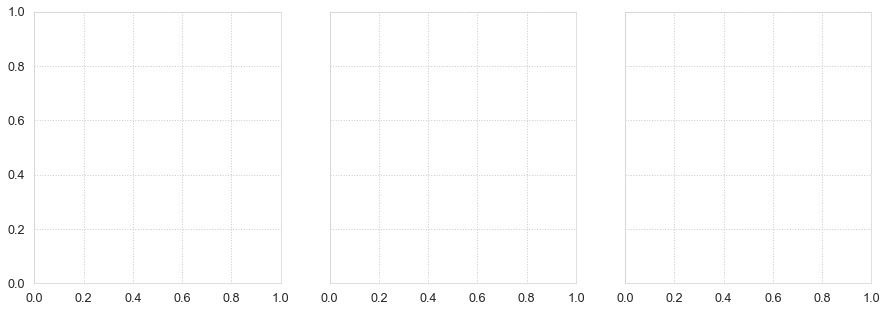

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)

for i in range(len(t1)):
    title = t2[i]
    FC_timecourse(ax[i], ds, itp, ftp, lines, t1[i], title, ylabel, FC=True)

plt.tight_layout()

fig.savefig("TimeLapse_AXLmutants.png")